In [1]:
from matplotlib import pyplot as plt
%matplotlib notebook
import glob
import os
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import os
from IPython.display import Image
import json
import cv2

In [2]:
DATASTE_FOLDER="/Users/user421/datasets/FUNSD/dataset/"

train = os.path.join(DATASTE_FOLDER, "training_data")
test = os.path.join(DATASTE_FOLDER, "testing_data")

train_images = sorted(glob.glob("{}/images/*".format(train)))
test_images = sorted(glob.glob("{}/images/*".format(test)))

train_annotations = sorted(glob.glob("{}/annotations/*".format(train)))
test_annotations = sorted(glob.glob("{}/annotations/*".format(test)))

print("Total Train images={}. Total Train annotations={}.".format(len(train_images), len(train_annotations)))
print("Total Test images={}. Total Test annotations={}.".format(len(test_images), len(test_annotations)))

Total Train images=149. Total Train annotations=149.
Total Test images=50. Total Test annotations=50.


In [3]:
class Constants:
    RED = [0, 0, 255]
    GREEN = [0,255, 0]
    BLUE = [255,0, 0]
    CYAN = [255, 255, 0]
    
    
class Box():
    def __init__(self, xmin, ymin, xmax, ymax):
        self.xmin, self.ymin, self.xmax, self.ymax = xmin, ymin, xmax, ymax
     
    def __repr__(self):
        return f"Box(xmin={self.xmin},ymin={self.ymin}, xmax={self.xmax}, ymax={self.ymax})"

class Word:
    def __init__(self, box, text):
        self.box = Box(*box)
        self.text = text
        
    def __getitem__(self, item):
        if not hasattr(self, item):
            raise KeyError(f"{item} is not present in {self.__class__}")
        return getattr(self, item)
    
    def __repr__(self):
        return f"Word(box={self.box}, text={self.text})"
        
    
class Entity:
    def __init__(self, id_, box, text, label, words, linking):
        self.id_ = id_
        self.box = Box(*box)
        self.text = text
        self.label = label
        self.words = [ Word(**word) for word in words ] 
        self.linking = linking
    
    def __getitem__(self, item):
        if not hasattr(self, item):
            raise KeyError(f"{item} is not present in {self.__class__}")
        return getattr(self, item)
    
    def __repr__(self):
        return f"Entity(id_={self.id_}, box={self.box}, text={self.text}, label={self.label}, words={self.words}, linking={self.linking})"
    
class Form():
    def __init__(self, entities):
        self.entities = [Entity(id_=idx, **entity) for idx, entity in enumerate(entities)]
        
    def __repr__(self):
        return f"Form(entities={self.entities})"

In [4]:
def label_to_color(label):
    return {
        "question": Constants.RED,
        "answer": Constants.GREEN,
        "header": Constants.BLUE,
        "other": Constants.CYAN,
    }[label]
    
    
def color_image(image, annotation):
    for entity in annotation.entities:
        box = entity.box
        image_crop = image[box.ymin:box.ymax, 
                           box.xmin:box.xmax, :]
        image_crop[np.where((image_crop < [127,127,127]).all(axis = 2))] = label_to_color(entity.label)
        image[box.ymin:box.ymax, 
                          box.xmin:box.xmax, :] = image_crop
        
    return image


In [5]:
train_image_file_names = [image_file.rsplit(os.sep,1)[-1] for image_file in train_images ]
train_images_dir = train_images[0].rsplit(os.sep,1)[0]

annotations = []
for train_annotation in train_annotations:
    with open(train_annotation) as fp:
        annotations.append(Form(json.loads(fp.read())["form"]))


colored_images = {image_file:color_image(cv2.imread(os.path.join(train_images_dir, image_file)), annotations[idx]) 
                for idx, image_file in enumerate(train_image_file_names) }

In [6]:

@interact
def show_images(image_file=train_image_file_names):
    
    image = colored_images[image_file]
    cv2.imwrite("temp.jpg", image)
    
    display(Image(data="temp.jpg"))
    
    

interactive(children=(Dropdown(description='image_file', options=('0000971160.png', '0000989556.png', '0000990…

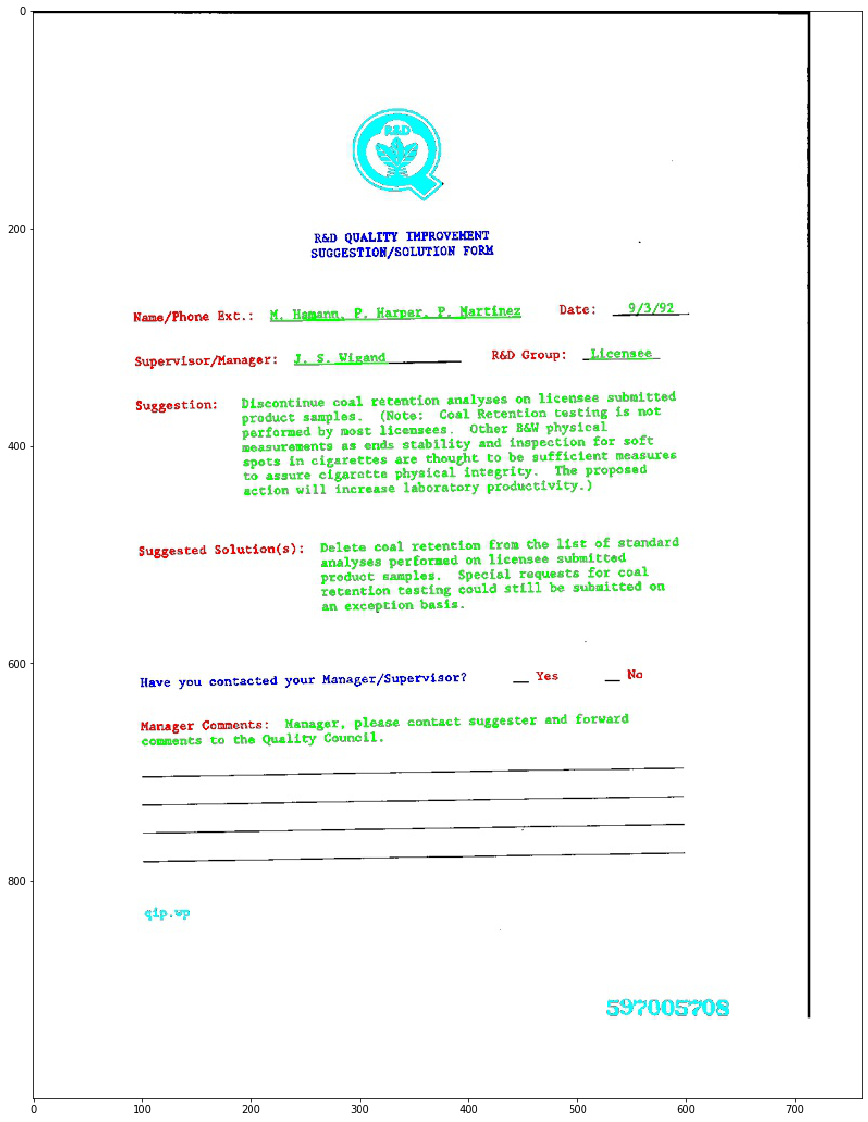

In [9]:
plt.figure(figsize=(40,20))
plt.imshow(plt.imread("temp.jpg"))